In [310]:
#Import relevant python libraries
import requests, json, time, datetime, warnings, re, os
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.dates as dates

import xarray as xr
import pandas as pd


In [369]:
#Point to directory containing downloaded netcdf files from the Southern Ocean array
pathname = 'C:/Users/Hilary/Dropbox/OceanHackWeek/southern-ocean-ooi-downloads/'
list_files = os.listdir(pathname)

In [370]:
#Remove any files that aren't netcdf - defensive coding
for i in list_files:
    if i.endswith('.nc') == False:
        list_files.remove(i)
filenames = [os.path.join(pathname, i) for i in list_files]

In [385]:
#Find all files that match a given platform
#platform = 'FLMA'
#platform = 'FLMB'
#platform = 'SUMO-SBD'
platform = 'SUMO-RID16'
#platform = 'SUMO-RII' #--> telemetered oxygen from these don't have the derived dissolved_oxygen variable, for pCO2 only have for 052, not 051 or 053

platform_sel = []
for i in filenames:
    if platform in i:
        platform_sel.append(i)

In [386]:
#Find all files from that platform that match a given sensor type
#sensor = 'DOSTA'
#variable_name = 'dissolved_oxygen'
#sensor = 'PHSEN'
#variable_name = 'phsen_abcdef_ph_seawater'
#sensor = 'FLORT'
#variable_name = 'fluorometric_chlorophyll_a'
#variable_name = 'optical_backscatter'
#sensor = 'NUTNR'
#variable_name = 'salinity_corrected_nitrate'
sensor = 'PCO2W'
variable_name = 'pco2_seawater'
#sensor = 'PCO2AA'
#variable_name = 'partial_pressure_co2_ssw'

sensor_sel = []
for i in platform_sel:
    if sensor in i:
        if 'blank' in i:
            pass
        else:
            sensor_sel.append(i)
        
sensor_sel

['C:/Users/Hilary/Dropbox/OceanHackWeek/southern-ocean-ooi-downloads/deployment0001_GS01SUMO-RID16-05-PCO2WB000-telemetered-pco2w_abc_dcl_instrument_20150218T220513.709000-20151222T180735.451000.nc',
 'C:/Users/Hilary/Dropbox/OceanHackWeek/southern-ocean-ooi-downloads/deployment0002_GS01SUMO-RID16-05-PCO2WB000-telemetered-pco2w_abc_dcl_instrument_20151214T220510.207000-20161126T100546.693000.nc']

In [387]:
#Define a function for opening each data file

def open_data(file):
    ds = xr.open_dataset(file)
    ds = ds.swap_dims({'obs': 'time'})
    ds = ds.sortby('time')
    return ds

In [388]:
#Open each file in the list using the function defined above

all_ds = [open_data(file) for file in sensor_sel]

In [390]:
# Uncomment this to print out the netcdf file info
#all_ds[1]

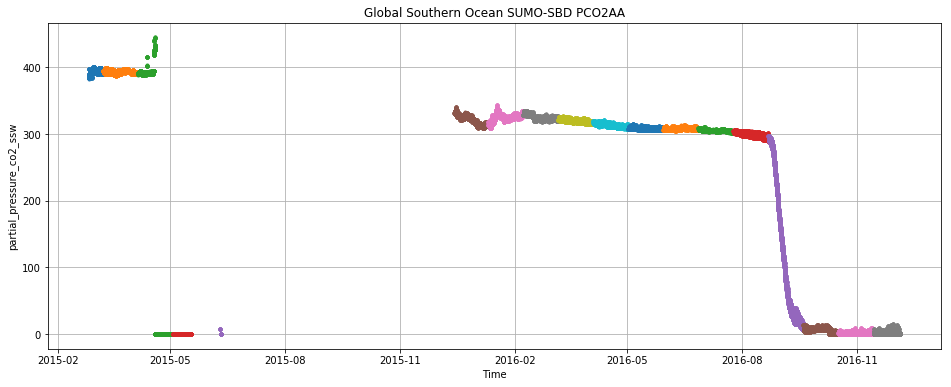

In [384]:
#Plot data from all datasets

fig, ax = plt.subplots(1)
fig.set_size_inches(16, 6)

for i,value in enumerate(all_ds):
    ax.plot(all_ds[i]['time'], all_ds[i][variable_name], marker='.', linewidth=0)
ax.grid()

plt.title('Global Southern Ocean ' + platform + ' ' + sensor)
plt.ylabel(variable_name)
plt.xlabel('Time')
#plt.ylim(0, 10)
plt.show()

#Save figure
fig.savefig('OOI_SouthernOcean_' + platform + '_' + sensor + '.png', dpi=fig.dpi)